In [3]:
# Importar la biblioteca:
import tensorflow as tf


In [4]:
# Importar el modelo:
from tensorflow import keras

In [5]:
# Cargar conjunto de datos de Tensor Flow:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 34s 8us/step


In [6]:
# Crear modelo secuencial:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [7]:
#Compilación del modelo:
model.compile(optimizer=tf.optimizers.Adam(), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [8]:
#Entrenamiento:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 9.9580 - accuracy: 0.6658
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6747 - accuracy: 0.7632
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6104 - accuracy: 0.7669
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5415 - accuracy: 0.8075
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5438 - accuracy: 0.8089


In [9]:
#Evaluación del modelo:
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 [==============================] - 2s 5ms/step - loss: 0.5524 - accuracy: 0.8202


In [17]:

#Predicción del modelo:
tf_predict = model.predict(test_images)
tf_predict


array([[5.0405538e-14, 9.2829802e-17, 4.1530933e-25, ..., 6.5337338e-02,
        1.2407563e-11, 9.2322367e-01],
       [4.1724916e-06, 4.0666959e-10, 9.9934036e-01, ..., 0.0000000e+00,
        8.8845518e-09, 0.0000000e+00],
       [2.8666452e-07, 9.9999964e-01, 7.7290814e-08, ..., 0.0000000e+00,
        4.3984125e-21, 0.0000000e+00],
       ...,
       [1.3502631e-03, 6.5406010e-23, 2.7864222e-10, ..., 3.9438119e-29,
        9.9844140e-01, 1.9452321e-26],
       [5.5168808e-08, 9.9999964e-01, 1.2451267e-09, ..., 0.0000000e+00,
        4.2672421e-11, 0.0000000e+00],
       [1.4836353e-12, 8.0815205e-10, 9.9646752e-15, ..., 1.1983373e-01,
        4.0481511e-05, 2.0205779e-03]], dtype=float32)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def img_subplot (tf_predict, test_images, text_labels, nrows, ncols):
  
  fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))
  tam = np.min([len(text_labels), nrows*ncols])
  
  i=0
  while (i<tam):
    for k in range(nrows):
      for j in range(ncols):
        ax[k,j].imshow(test_images[i], cmap='gray')
        p_label = np.where(tf_predict[i]==np.max(tf_predict[i]))[0][0]
        ax[k,j].set_title(text_labels[p_label])
        ax[k,j].grid()
        
        i=i+1

  plt.show()   

In [14]:
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress',
               'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']


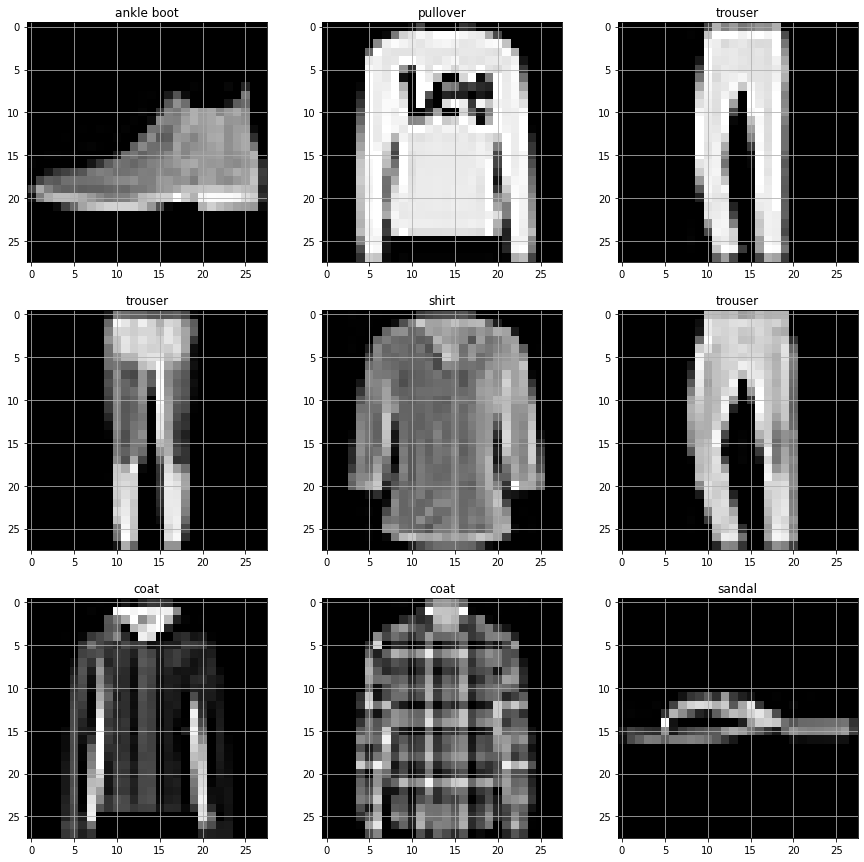

In [18]:
img_subplot(tf_predict, test_images, text_labels, 3, 3)
